In [1]:
#Cargamos las Librerias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from funciones_mecanizados import cortar
from funciones_mecanizados import normalizar
from sklearn.manifold import TSNE

In [2]:
# Cargamos el dataset completo sin normalizar pero dividivo en mecanizados .
h1_norm = pd.read_csv('data/panel1_H1_norm.csv')
h2_norm = pd.read_csv('data/panel2_H2_norm.csv')
h3_norm = pd.read_csv('data/panel1_H3_norm.csv')


 
columnas = ['RMS','AMP','ENER','P_FRQ','PCNTS','C_FRQ', 'I_FRQ','A_FRQ','DURATION',
            'R_FRQ','ASL','COUN','ABS_ENERGY', 'SIG_STRNGTH','RISE', 'P_MARSE']

mecanizados = pd.concat([h1_norm, h2_norm, h3_norm])
mecanizados.reset_index(drop=True, inplace=True)

In [3]:
# Función para aplicar el tsne
def tsne_fit(data,modelo,columnas):
    data_tsne = modelo.fit_transform(data[columnas])
    data_tsne_df = pd.DataFrame(data_tsne, index=data.index)
    data_tsne_df['Herramienta'] = data['Herramienta']
    data_tsne_df['Etapa'] = data['Etapa']
    data_tsne_df = data_tsne_df.rename(columns={0:'SNE1', 1:'SNE2', 2:'SNE3'})
    return data_tsne_df

def plot2d_tsne(data,hue):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=data, x='SNE1', y='SNE2', hue=hue)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('tSNE1',fontsize=14)
    plt.ylabel('tSNE2',fontsize=14)
    plt.show()

def plot3d_tsne(data):
    %matplotlib notebook

    fig = plt.figure(figsize=(8,5))
    ax1 = fig.add_subplot(111, projection='3d')
    X_tsne_df_H1 = data[data['Herramienta']=='H1']
    X_tsne_df_H2 = data[data['Herramienta']=='H2']
    X_tsne_df_H3 = data[data['Herramienta']=='H3'] 

    ax1.scatter(X_tsne_df_H1['SNE1'], X_tsne_df_H1['SNE2'], X_tsne_df_H1['SNE3'], c='b' , marker='o', label='H1')
    ax1.scatter(X_tsne_df_H2['SNE1'], X_tsne_df_H2['SNE2'], X_tsne_df_H2['SNE3'], c='darkorange' , marker='o', label='H2')
    ax1.scatter(X_tsne_df_H3['SNE1'], X_tsne_df_H3['SNE2'], X_tsne_df_H3['SNE3'], c='g' , marker='o', label='H3')
    plt.legend(loc="upper left")
    plt.show()

    ax1.set_xlabel('tSNE1', fontsize=14)
    ax1.set_ylabel('tSNE2', fontsize=14)
    ax1.set_zlabel('tSNE3', fontsize=14)
    plt.show()

In [7]:
# Cantidad de datos elminados cuando se aplica el filtro
# muestras eliminadas (arreglar)
#cant_pre_filtro =mecanizados[0].shape[0] + data[1].shape[0] + data[2].shape[0]
#cant_post_filtro = fresado_h1.shape[0] + fresado_h2.shape[0] + fresado_h3.shape[0]
#print(cant_post_filtro)
#print(cant_pre_filtro)
#print(cant_pre_filtro- cant_post_filtro)
#print(((cant_pre_filtro- cant_post_filtro)/ cant_pre_filtro)*100)

## Todas las Etapas

In [171]:
todo = mecanizados.copy()

todo_tsne_modelo = TSNE(perplexity=82, n_components=3, n_iter=2000,
                    random_state=23, learning_rate=160)
#Sin filtro
todo_tsne_df = tsne_fit(todo, todo_tsne_modelo)

#Con filtro
nivel_filtro = 0.1
todo_filtrado = todo.drop(todo[todo['ENER']<nivel_filtro].index, axis=0)

todo_filtrado_tsne_df = tsne_fit(todo_filtrado, todo_tsne_modelo)

<IPython.core.display.Javascript object>


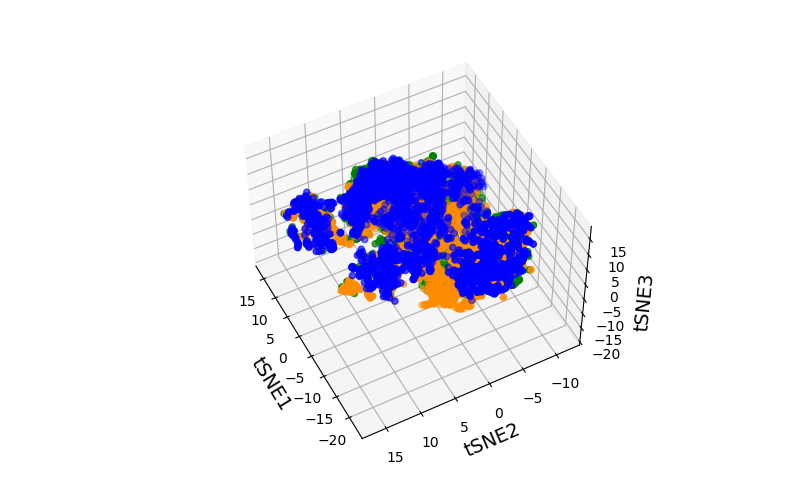

In [174]:
plot3d_tsne(todo_tsne_df)

<IPython.core.display.Javascript object>


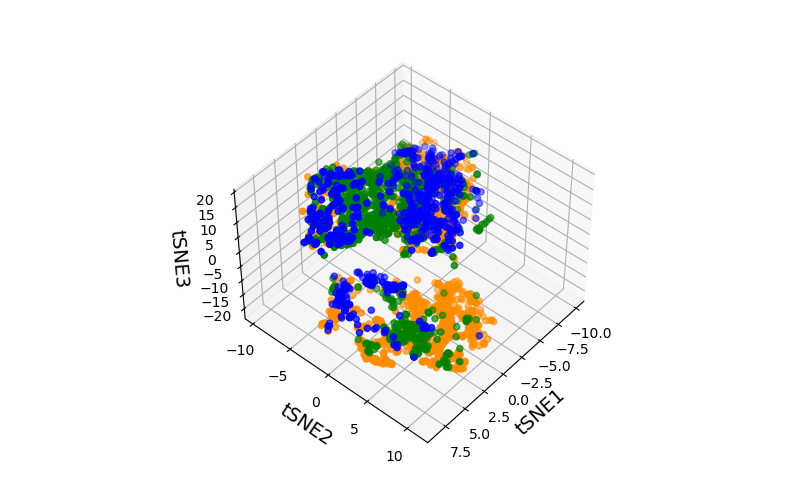

In [173]:
plot3d_tsne(todo_filtrado_tsne_df)

## Etapa de Agujereado

In [151]:
todo = mecanizados.copy()

Agujereado = todo[todo['Etapa']=='Agujereado']
Agujereado_tsne_modelo = TSNE(perplexity=47, n_components=3, n_iter=5000,
                    random_state=23, learning_rate=60)
#Sin filtro
Agujereado_tsne_df = tsne_fit(Agujereado, Agujereado_tsne_modelo)

#Con filtro
nivel_filtro = 0.1
Agujereado_filtrado = Agujereado.drop(Agujereado[Agujereado['ENER']<nivel_filtro].index, axis=0)

Agujereado_filtrado_tsne_df = tsne_fit(Agujereado_filtrado, Agujereado_tsne_modelo)

<IPython.core.display.Javascript object>


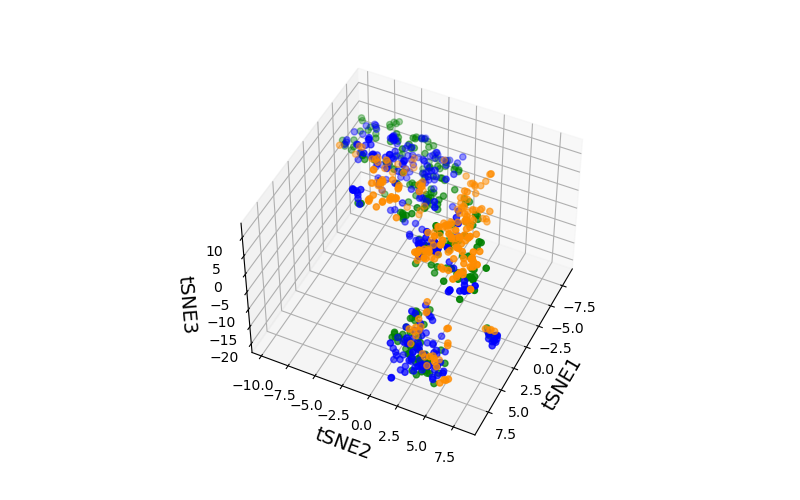

In [177]:
plot3d_tsne(Agujereado_tsne_df)

<IPython.core.display.Javascript object>


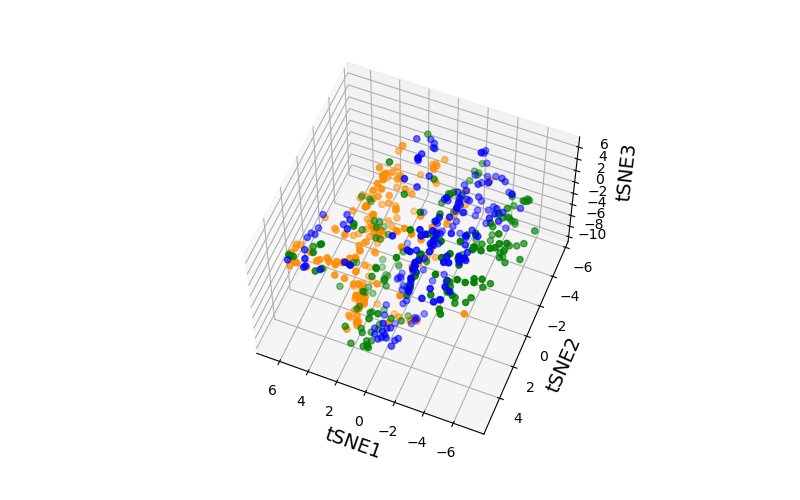

In [176]:
plot3d_tsne(Agujereado_filtrado_tsne_df)

## Etapa de Fresado

In [5]:
todo = mecanizados.copy()

Fresado = todo[todo['Etapa']=='Fresado']
Fresado_tsne_modelo = TSNE(perplexity=36, n_components=3, n_iter=1000,
                    random_state=27, learning_rate=12)
#Sin filtro
fresado_tsne_df = tsne_fit(Fresado, Fresado_tsne_modelo, columnas)

#Con filtro
nivel_filtro = 0.1
Fresado_filtrado = Fresado.drop(Fresado[Fresado['ENER']<nivel_filtro].index, axis=0)

Fresado_filtrado_tsne_df = tsne_fit(Fresado_filtrado, Fresado_tsne_modelo, columnas)

<IPython.core.display.Javascript object>


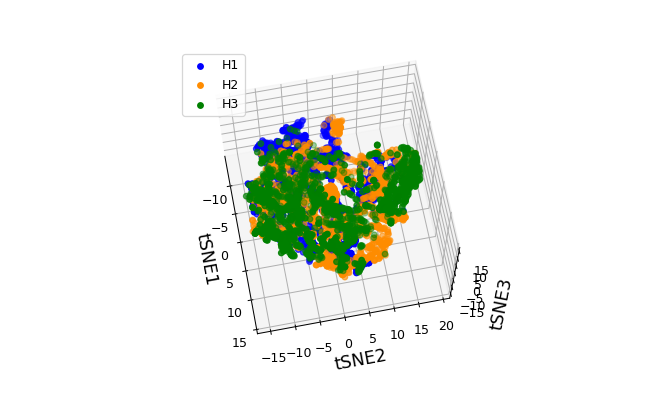

In [6]:
plot3d_tsne(fresado_tsne_df)

<IPython.core.display.Javascript object>


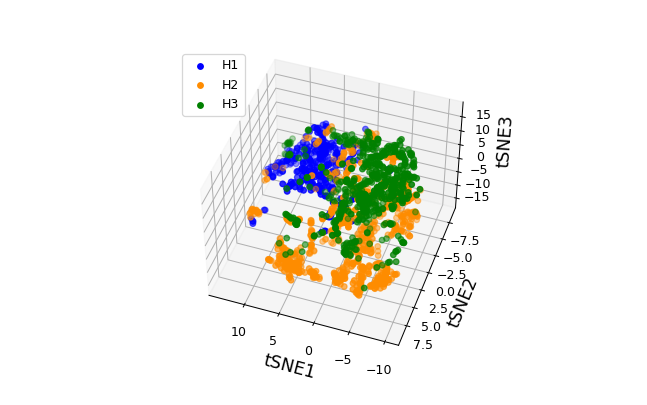

In [7]:
plot3d_tsne(Fresado_filtrado_tsne_df)

In [7]:
X_tsne_df.to_csv(r'data/tSNE_data.csv', index=False)

# Menos variables

In [51]:
col = ['P_FRQ','RMS','P_MARSE','COUN','A_FRQ','I_FRQ']

todo = mecanizados.copy()

Fresado_ = todo[todo['Etapa']=='Fresado']
Fresado_tsne_modelo_ = TSNE(perplexity=62, n_components=3, n_iter=3000, random_state=80, learning_rate=522)
#Sin filtro
#fresado_tsne_df = tsne_fit(Fresado, Fresado_tsne_modelo,col)

#Con filtro
nivel_filtro = 0.1
Fresado_filtrado_ = Fresado_.drop(Fresado_[Fresado_['ENER']<nivel_filtro].index, axis=0)

Fresado_filtrado_tsne_df = tsne_fit(Fresado_filtrado_, Fresado_tsne_modelo_,col)

In [39]:
Fresado_filtrado_.shape

(1767, 21)

<IPython.core.display.Javascript object>


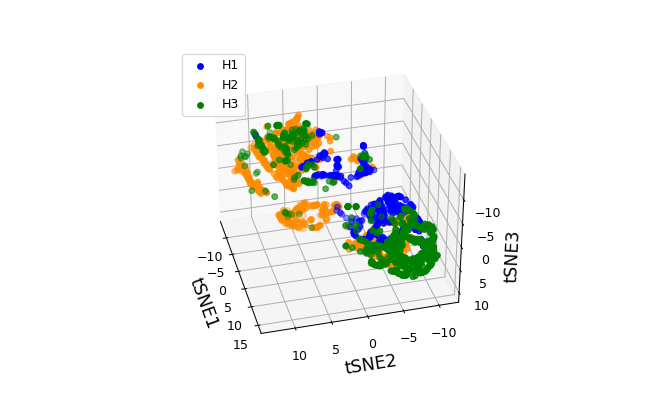

In [52]:
plot3d_tsne(Fresado_filtrado_tsne_df)